In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Load the CSV file with a specified encoding
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

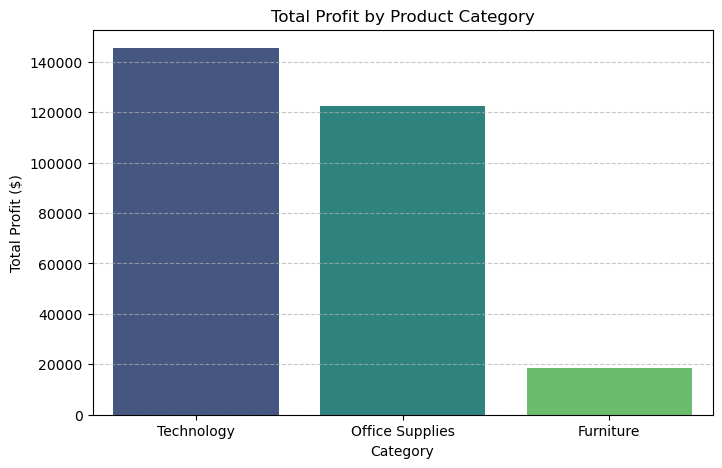

✅ Actionable Insights:
- Focus on expanding 'Office Supplies' and 'Technology' categories as they are the most profitable.
- Investigate why 'Furniture' is underperforming and optimize costs or pricing.


In [15]:
# Convert Order Date to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

### 1. Profitability by Category ###
category_profit = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
# Assign the x variable to hue and set legend=False
sns.barplot(x=category_profit.index, y=category_profit.values, hue=category_profit.index, palette=sns.color_palette("viridis", len(category_profit)), legend=False)
plt.title("Total Profit by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Profit ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔥 Actionable Insights:
print("✅ Actionable Insights:")
print("- Focus on expanding 'Office Supplies' and 'Technology' categories as they are the most profitable.")
print("- Investigate why 'Furniture' is underperforming and optimize costs or pricing.")


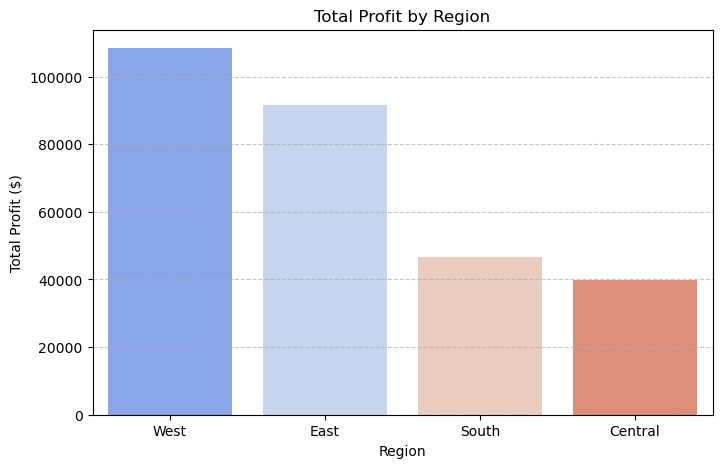


✅ Actionable Insights:
- The 'West' region is the most profitable—continue growth strategies here.
- The 'South' region struggles in profitability—analyze cost structures and improve marketing strategies.


In [73]:
### 2. Regional Profitability ###
region_profit = df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=region_profit.index, y=region_profit.values, palette="coolwarm")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit ($)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔥 Actionable Insights:
print("\n✅ Actionable Insights:")
print("- The 'West' region is the most profitable—continue growth strategies here.")
print("- The 'South' region struggles in profitability—analyze cost structures and improve marketing strategies.")


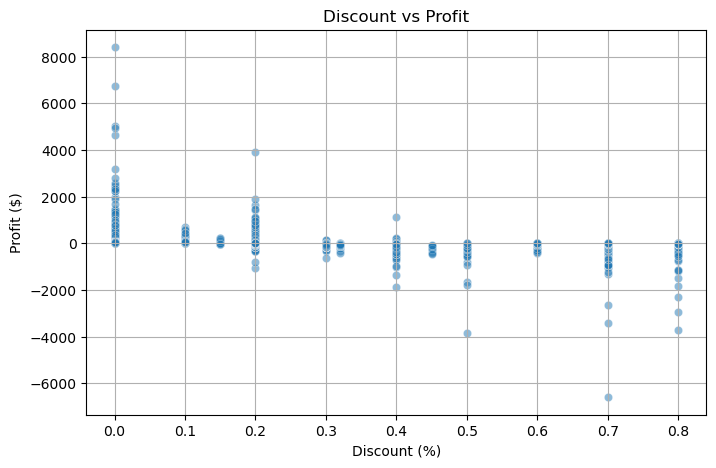


✅ Actionable Insights:
- Avoid excessive discounting, especially above 20%, as it leads to losses.
- Implement a structured discounting strategy to ensure profitability.


In [75]:
### 3. Impact of Discount on Profit ###
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount"], y=df["Profit"], alpha=0.5)
plt.title("Discount vs Profit")
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()

# 🔥 Actionable Insights:
print("\n✅ Actionable Insights:")
print("- Avoid excessive discounting, especially above 20%, as it leads to losses.")
print("- Implement a structured discounting strategy to ensure profitability.")

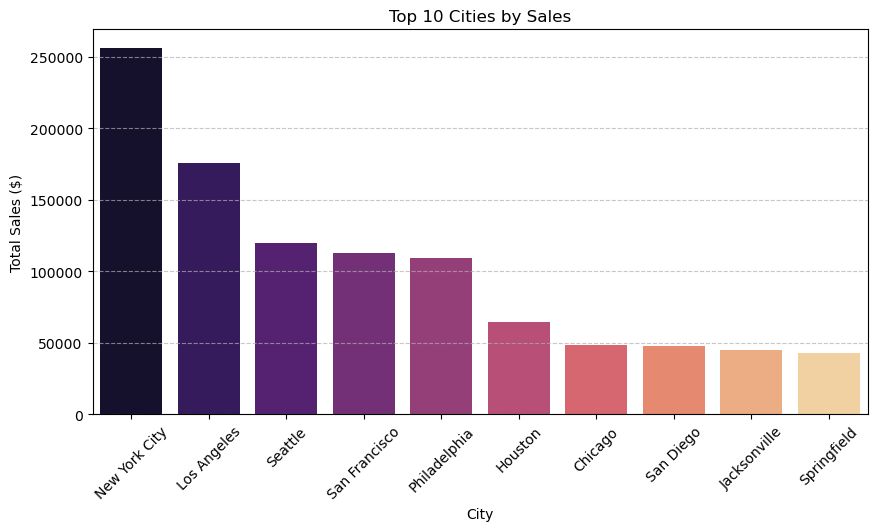


✅ Actionable Insights:
- Focus on improving logistics and supply chain in top-selling cities (New York, Los Angeles, Seattle).
- Identify fast-moving products in these cities and increase inventory levels.


In [77]:
### 4. Top 10 Cities by Sales ###
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=city_sales.index, y=city_sales.values, palette="magma")
plt.title("Top 10 Cities by Sales")
plt.xlabel("City")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# 🔥 Actionable Insights:
print("\n✅ Actionable Insights:")
print("- Focus on improving logistics and supply chain in top-selling cities (New York, Los Angeles, Seattle).")
print("- Identify fast-moving products in these cities and increase inventory levels.")

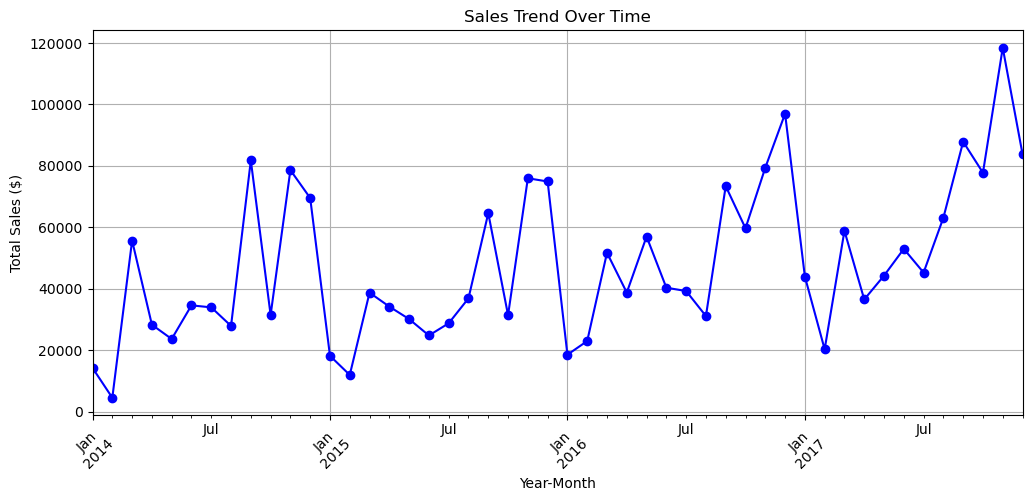


✅ Actionable Insights:
- Sales show a seasonal pattern—identify peak months for better inventory planning.
- Maintain higher stock and marketing efforts during high-sales periods.

📌 FINAL SUMMARY & BUSINESS RECOMMENDATIONS:
1️⃣ Office Supplies & Technology are highly profitable; Furniture needs improvement.
2️⃣ West region is the best performer, while the South region needs strategic intervention.
3️⃣ Discounts above 20% often lead to losses—implement a structured discounting plan.
4️⃣ New York, Los Angeles, and Seattle drive the highest sales—strengthen logistics there.
5️⃣ Sales have seasonal trends—optimize inventory for peak sales periods.


In [79]:
### 5. Sales Trend Over Time ###
time_series = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum()

plt.figure(figsize=(12, 5))
time_series.plot(kind="line", marker="o", color="blue")
plt.title("Sales Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 🔥 Actionable Insights:
print("\n✅ Actionable Insights:")
print("- Sales show a seasonal pattern—identify peak months for better inventory planning.")
print("- Maintain higher stock and marketing efforts during high-sales periods.")

### FINAL SUMMARY ###
print("\n📌 FINAL SUMMARY & BUSINESS RECOMMENDATIONS:")
print("1️⃣ Office Supplies & Technology are highly profitable; Furniture needs improvement.")
print("2️⃣ West region is the best performer, while the South region needs strategic intervention.")
print("3️⃣ Discounts above 20% often lead to losses—implement a structured discounting plan.")
print("4️⃣ New York, Los Angeles, and Seattle drive the highest sales—strengthen logistics there.")
print("5️⃣ Sales have seasonal trends—optimize inventory for peak sales periods.")

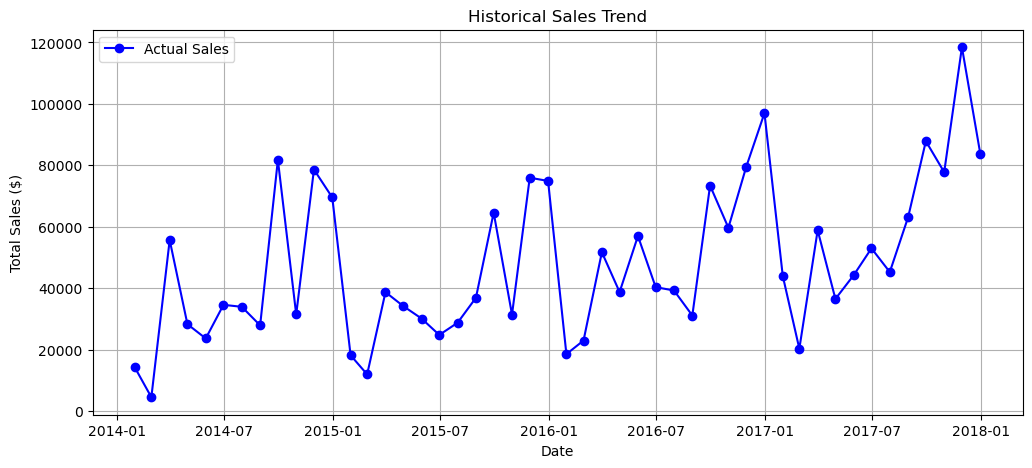

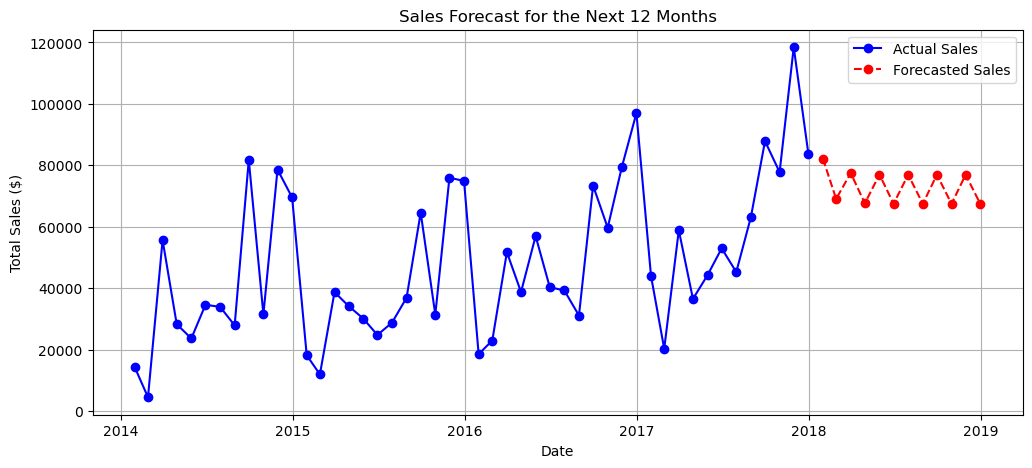


✅ Actionable Insights:
- Sales show seasonal trends—adjust inventory to meet demand during peak months.
- Forecast indicates an upward trend—ensure supply chain readiness for increased demand.
- Use predictive insights to optimize marketing and discount strategies for maximum profitability.

📌 Business Recommendation:
1️⃣ Plan inventory in advance based on forecasted peak sales months.
2️⃣ Adjust marketing efforts according to expected demand fluctuations.
3️⃣ Monitor and refine forecasting models periodically for better accuracy.


In [85]:
# Convert 'Order Date' to datetime and set as index
df["Order Date"] = pd.to_datetime(df["Order Date"])
df.set_index("Order Date", inplace=True)

# Aggregate monthly sales
monthly_sales = df["Sales"].resample("M").sum()

# Plot historical sales trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, marker="o", linestyle="-", color="blue", label="Actual Sales")
plt.title("Historical Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.legend()
plt.show()

# Train ARIMA model (p, d, q) parameters chosen heuristically
model = ARIMA(monthly_sales, order=(2, 1, 2))  # ARIMA(p=2, d=1, q=2)
model_fit = model.fit()

# Forecast sales for next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

# Create date range for forecasted data
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps + 1, freq="M")[1:]

# Plot actual vs. forecasted sales
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales, marker="o", linestyle="-", color="blue", label="Actual Sales")
plt.plot(forecast_index, forecast, marker="o", linestyle="dashed", color="red", label="Forecasted Sales")
plt.title("Sales Forecast for the Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.legend()
plt.show()

# 🔥 Actionable Insights:
print("\n✅ Actionable Insights:")
print("- Sales show seasonal trends—adjust inventory to meet demand during peak months.")
print("- Forecast indicates an upward trend—ensure supply chain readiness for increased demand.")
print("- Use predictive insights to optimize marketing and discount strategies for maximum profitability.")

# 📌 Business Recommendation:
print("\n📌 Business Recommendation:")
print("1️⃣ Plan inventory in advance based on forecasted peak sales months.")
print("2️⃣ Adjust marketing efforts according to expected demand fluctuations.")
print("3️⃣ Monitor and refine forecasting models periodically for better accuracy.")